In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv('evals/es_dense_train100.csv')
df2 = pd.read_csv('evals/es_dense_train100_reranked.csv')
df_basic = df1
df_reranking = df2
df_basic['n_contexts'] = df_basic['k']
df_reranking['n_contexts'] = df_reranking['n_reranked_contexts']
df_basic['type'] = 'basic'
df_reranking['type'] = 'reranking'

In [7]:
# merge the two dataframes
df = pd.concat([df_basic, df_reranking], ignore_index=True)

In [25]:
df.groupby(['type'])['answer_similarity'].count()

type
basic        100
reranking    100
Name: answer_similarity, dtype: int64

In [15]:
df[df['answer_correctness'].isna()]

,qa_index,vector_store,chunk_size,chunk_overlap,doc_embedder,k,generator,question,original_context,contexts,ground_truth,answer,context_relevancy,context_precision,answer_correctness,answer_relevancy,answer_similarity,n_contexts,type,n_reranked_contexts
12,12,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What is the purpose of the TRUGLO Picatinny Ri...,We Ship Fast!\nOrder by 1PM CST for Same Day S...,['We Ship Fast!\nOrder by 1PM CST for Same Day...,The TRUGLO Picatinny Riser Mount is great for ...,The TRUGLO Picatinny Riser Mount raises the mo...,0.078947,0.00,NaN,0.942508,0.999512,5,basic,NaN
24,24,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,"What is the license under which ""Fat and Not A...",I was happy to see this story last night in th...,"['Within the transit industry, the work popula...","""Fat and Not Afraid"" by JeninCanada is license...","The text ""Fat and Not Afraid"" by JeninCanada i...",0.111111,0.25,NaN,0.804395,-0.012523,5,basic,NaN
30,30,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,Who is the soprano featured in duets with Robe...,Roberto Alagna – My Life Is An Opera (2014) [P...,['Roberto Alagna – My Life Is An Opera (2014) ...,The soprano featured in duets with Roberto Ala...,The soprano featured in duets with Roberto Ala...,0.090909,1.00,NaN,0.782032,1.000000,5,basic,NaN
41,41,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What is the author planning to reveal on Novem...,Just a heads up to let you know on November 2n...,['And they’re expecting a bombshell of a book ...,The author is planning to reveal the cover of ...,"The author, Melanie Schultz, is planning to re...",0.058824,0.00,NaN,0.830097,0.999018,5,basic,NaN
56,56,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What does the name Madigan mean in Irish?,One Forgotten Treasure\nAnother Faithwriters s...,['edit* my ancestors were from Clan Ross\nFami...,Madigan means “small dog” in Irish.,"The surname Madigan means ""small dog"" in Irish.",0.048387,0.00,NaN,0.772710,0.999481,5,basic,NaN
93,93,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What are the key areas of responsibility for M...,Sustainability\nMETRO SUSTAINABLE\nOur society...,['The guiding principles for us are the United...,The key areas of responsibility for METRO SUST...,"The two projects, rainwater management and int...",0.050847,1.00,NaN,0.735794,-0.015943,5,basic,NaN
96,96,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What are the steps to apply for a real estate ...,FAQ: How do I apply for my license through eAc...,['FAQ: How do I apply for my license through e...,The steps to apply for a real estate license t...,To apply for a real estate license through eAc...,0.076923,1.00,NaN,0.916024,0.016929,5,basic,NaN
112,12,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,What is the purpose of the TRUGLO Picatinny Ri...,We Ship Fast!\nOrder by 1PM CST for Same Day S...,['We Ship Fast!\nOrder by 1PM CST for Same Day...,The TRUGLO Picatinny Riser Mount is great for ...,The purpose of the TRUGLO Picatinny Riser Moun...,0.187500,0.00,NaN,0.942508,0.999115,1,reranking,1.0
124,24,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,"What is the license under which ""Fat and Not A...",I was happy to see this story last night in th...,['No relevant contexts.'],"""Fat and Not Afraid"" by JeninCanada is license...","The song ""Fat and Not Afraid"" by JeninCanada i...",1.000000,0.00,NaN,0.793568,0.781020,0,reranking,0.0
130,30,es-dense,1000,200,all-MiniLM-L6-v2,5,ollama3_1,Who is the soprano featured in duets with Robe...,Roberto Alagna – My Life Is An Opera (2014) [P...,['Roberto Alagna – My Life Is An Opera (2014) ...,The soprano featured in duets with Roberto Ala...,The soprano featured in duets with Roberto Ala...,0.173913,1.00,NaN,0.782032,1.000000,3,reranking,3.0


<Axes: xlabel='context_precision', ylabel='Proportion'>

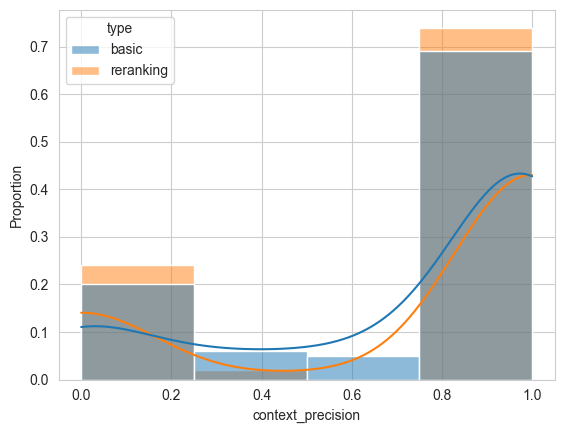

In [39]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='context_precision', hue='type', kde=True, multiple='layer', bins=4, stat='proportion',common_norm=False)

<Axes: xlabel='answer_similarity', ylabel='Proportion'>

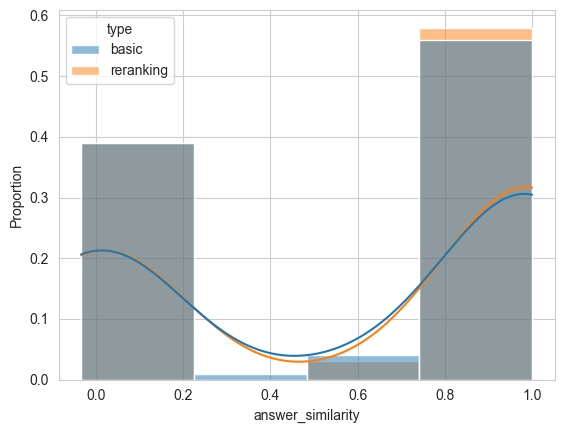

In [40]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='answer_similarity', hue='type', kde=True, multiple='layer', bins=4, stat='proportion',common_norm=False)

<Axes: xlabel='answer_correctness', ylabel='Proportion'>

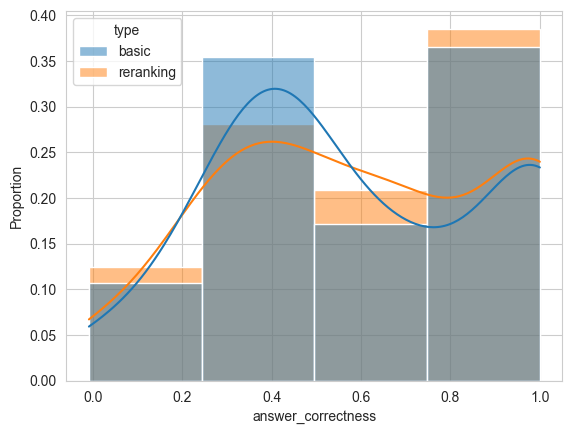

In [38]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='answer_correctness', hue='type', kde=True, multiple='layer', bins=4, stat='proportion',common_norm=False)

<Axes: xlabel='context_relevancy', ylabel='Proportion'>

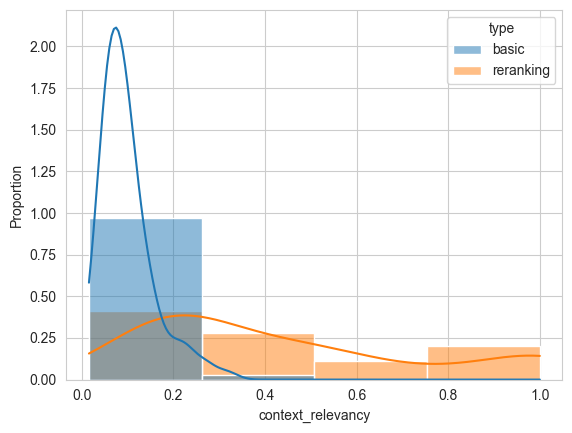

In [41]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='context_relevancy', hue='type', kde=True, multiple='layer', bins=4, stat='proportion',common_norm=False)